In [129]:
import pandas as pd
import matplotlib.pyplot as plt

In [130]:
df = pd.read_csv('FinancialMarketData.xlsx - EWS.csv')
print(df.shape)
df.head()

(1111, 44)


,Y,Data,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,...,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN
0,0,1/11/2000,283.25,0.077,1388.0,157.26,100.56,105.86,1.646,25.77,...,116.464,230.527,123.762,1416.12,127.75,990.59,856.76,224.33,217.34,34.30
1,0,1/18/2000,287.65,0.043,1405.0,165.01,101.86,105.47,1.638,28.85,...,117.267,231.377,123.762,1428.79,129.50,993.98,925.22,234.37,227.08,32.74
2,0,1/25/2000,287.15,0.135,1368.0,167.24,102.41,106.04,1.650,28.28,...,117.995,232.390,123.762,1385.93,126.48,974.83,886.93,216.82,233.00,32.46
3,0,2/1/2000,282.75,0.191,1311.0,166.85,104.92,107.85,1.611,28.22,...,120.510,231.942,122.328,1385.31,129.19,1007.12,842.60,201.89,237.48,31.29
4,1,2/8/2000,298.40,0.312,1277.0,165.43,104.22,109.30,1.611,28.02,...,118.791,237.812,122.328,1411.95,134.67,1034.58,945.15,218.00,258.02,31.32


In [118]:
print(df.isnull().sum())

Y            0
Data         0
XAU BGNL     0
ECSURPUS     0
BDIY         0
CRY          0
DXY          0
JPY          0
GBP          0
Cl1          0
VIX          0
USGG30YR     0
GT10         0
USGG2YR      0
USGG3M       0
US0001M      0
GTDEM30Y     0
GTDEM10Y     0
GTDEM2Y      0
EONIA        0
GTITL30YR    0
GTITL10YR    0
GTITL2YR     0
GTJPY30YR    0
GTJPY10YR    0
GTJPY2YR     0
GTGBP30Y     0
GTGBP20Y     0
GTGBP2Y      0
LUMSTRUU     0
LMBITR       0
LUACTRUU     0
LF98TRUU     0
LG30TRUU     0
LP01TREU     0
EMUSTRUU     0
LF94TRUU     0
MXUS         0
MXEU         0
MXJP         0
MXBR         0
MXRU         0
MXIN         0
MXCN         0
dtype: int64


[0 1] [874 237]


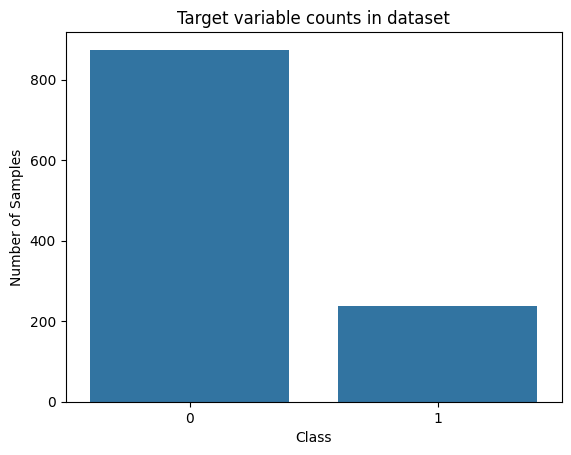

In [131]:
import numpy as np
import seaborn as sns
(unique, counts) = np.unique(df['Y'], return_counts=True)
print(unique, counts)
sns.barplot(x=unique, y=counts)
plt.xlabel("Class")
plt.ylabel("Number of Samples")
plt.xticks()
plt.title('Target variable counts in dataset')
plt.show()

In [134]:
crash_status = df['Y']
# features = df.loc[:, ['ECSURPUS', 'JPY', 'GBP', 'Cl1', 'VIX', 'EONIA']]
features = df.drop(['Y', 'Data'], axis=1)
features.head()

,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,VIX,USGG30YR,...,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN
0,283.25,0.077,1388.0,157.26,100.56,105.86,1.646,25.77,22.50,6.671,...,116.464,230.527,123.762,1416.12,127.75,990.59,856.76,224.33,217.34,34.30
1,287.65,0.043,1405.0,165.01,101.86,105.47,1.638,28.85,21.50,6.747,...,117.267,231.377,123.762,1428.79,129.50,993.98,925.22,234.37,227.08,32.74
2,287.15,0.135,1368.0,167.24,102.41,106.04,1.650,28.28,23.02,6.634,...,117.995,232.390,123.762,1385.93,126.48,974.83,886.93,216.82,233.00,32.46
3,282.75,0.191,1311.0,166.85,104.92,107.85,1.611,28.22,23.45,6.423,...,120.510,231.942,122.328,1385.31,129.19,1007.12,842.60,201.89,237.48,31.29
4,298.40,0.312,1277.0,165.43,104.22,109.30,1.611,28.02,21.25,6.231,...,118.791,237.812,122.328,1411.95,134.67,1034.58,945.15,218.00,258.02,31.32


In [135]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(features, crash_status, test_size=0.3, shuffle=False)
X_train.head()

,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,VIX,USGG30YR,...,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN
0,283.25,0.077,1388.0,157.26,100.56,105.86,1.646,25.77,22.50,6.671,...,116.464,230.527,123.762,1416.12,127.75,990.59,856.76,224.33,217.34,34.30
1,287.65,0.043,1405.0,165.01,101.86,105.47,1.638,28.85,21.50,6.747,...,117.267,231.377,123.762,1428.79,129.50,993.98,925.22,234.37,227.08,32.74
2,287.15,0.135,1368.0,167.24,102.41,106.04,1.650,28.28,23.02,6.634,...,117.995,232.390,123.762,1385.93,126.48,974.83,886.93,216.82,233.00,32.46
3,282.75,0.191,1311.0,166.85,104.92,107.85,1.611,28.22,23.45,6.423,...,120.510,231.942,122.328,1385.31,129.19,1007.12,842.60,201.89,237.48,31.29
4,298.40,0.312,1277.0,165.43,104.22,109.30,1.611,28.02,21.25,6.231,...,118.791,237.812,122.328,1411.95,134.67,1034.58,945.15,218.00,258.02,31.32


In [136]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, roc_curve, mean_squared_error, accuracy_score, precision_score, recall_score, f1_score, precision_recall_fscore_support, classification_report

models = {}

# Logistic Regression
models['LogisticRegression'] = LogisticRegression(max_iter=100)

# Decision Tree Classifier
models['Decision Trees'] = DecisionTreeClassifier()

# Isolation Forest
# models['Isolation Forest'] = IsolationForest()

models['Random Forest'] = RandomForestClassifier()

# XGBoost
models['Xgboost'] = XGBClassifier()



accuracy, precision, recall, f1score, support = {}, {}, {}, {}, {}

for key in models.keys():

    #Fit the classifier model
    models[key].fit(X_train, Y_train)

    #Prediction
    predictions = models[key].predict(X_val)

    # Calculate 
    accuracy[key] = accuracy_score(predictions, Y_val)
    precision[key] = precision_score(predictions, Y_val, average='micro')
    recall[key] = recall_score(predictions, Y_val, average='micro')
    f1score[key] = f1_score(predictions, Y_val, average='micro')
    support[key] = precision_recall_fscore_support(predictions, Y_val, average='micro')
    Y_predict = models[key].predict(X_val)
    auc = roc_auc_score(Y_val, Y_predict)
    print('Classification Report: ', key)
    print(classification_report(Y_val, predictions))

    false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_val, predictions)
    print('ROC_AUC_SCORE is', roc_auc_score(Y_val, predictions))


C:\Users\khans\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\khans\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

Classification Report:  LogisticRegression
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       295
           1       0.00      0.00      0.00        39

    accuracy                           0.88       334
   macro avg       0.44      0.50      0.47       334
weighted avg       0.78      0.88      0.83       334

ROC_AUC_SCORE is 0.5
Classification Report:  Decision Trees
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       295
           1       0.94      0.41      0.57        39

    accuracy                           0.93       334
   macro avg       0.93      0.70      0.77       334
weighted avg       0.93      0.93      0.92       334

ROC_AUC_SCORE is 0.7034332898739678
Classification Report:  Random Forest
              precision    recall  f1-score   support

           0       0.94      0.83      0.88       295
           1       0.31      0.56      0.40        39

    a

In [137]:
# Number of trees in Random Forest
n_estimators = [int(x) for x in np.linspace(start=10, stop=80, num=10)]

# Number of features to consider at every split
max_features = ['log2', 'sqrt']

# Maximum number of levels in tree
max_depth = [2,4]

# Minimum number of samples required to split a node
min_samples_split = [2, 5]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]

# Method of selecting samples for training each tree
bootstrap = [True, False]




In [138]:
# Create the param grid
param_grid = { 'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['log2', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [139]:
from sklearn.model_selection import RandomizedSearchCV
rf_model = RandomForestClassifier()

rf_RandomGrid = RandomizedSearchCV(estimator= rf_model, param_distributions=param_grid, cv=10, verbose=2, n_jobs=4 )
rf_RandomGrid.fit(X_train, Y_train)
rf_RandomGrid.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


{'n_estimators': 80,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 4,
 'bootstrap': False}

In [140]:
models['Random Forest'] = RandomForestClassifier(n_estimators=80, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', max_depth=4, bootstrap=False)
models['Random Forest'].fit(X_train, Y_train)
predictions = models['Random Forest'].predict(X_val)


accuracy['Random Forest'] = accuracy_score(predictions, Y_val)
precision['Random Forest'] = precision_score(predictions, Y_val, average='micro')
recall['Random Forest'] = recall_score(predictions, Y_val, average='micro')
f1score['Random Forest'] = f1_score(predictions, Y_val, average='micro')
support['Random Forest'] = precision_recall_fscore_support(predictions, Y_val, average='micro')

print('Classification Report: ', 'Random Forest')
print(classification_report(Y_val, predictions))

Classification Report:  Random Forest
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       295
           1       1.00      0.41      0.58        39

    accuracy                           0.93       334
   macro avg       0.96      0.71      0.77       334
weighted avg       0.94      0.93      0.92       334



In [127]:
# from imblearn.over_sampling import SMOTE
# sm = SMOTE(random_state = 2)
# X_train_res, y_train_res = sm.fit_resample(X_train, Y_train)

# #Logistic Regression
# lr1 = LogisticRegression(max_iter=100)
# lr1.fit(X_train_res, y_train_res)
# lr_predictions = lr1.predict(X_val)
# print(classification_report(Y_val, lr_predictions))

# #Random Forest
# rf = RandomForestClassifier()
# rf.fit(X_train_res, y_train_res)
# rf_predictions = rf.predict(X_val)
# print(classification_report(Y_val, rf_predictions))